In [1]:
import resources.Get_Data as Get_Data
from resources.single_data.RF_AR import RF_AR
from resources.single_data.CART_AR import CART_AR
from resources.single_data.KNN_AR import KNN_AR
from resources.vectorised_data.MISO.ARX_repr.KNN_ARX import KNN_ARX
from resources.vectorised_data.MISO.ARX_repr.CART_ARX import CART_ARX
from resources.vectorised_data.MISO.ARX_repr.RF_ARX import RF_ARX
import matplotlib.pyplot as plt
import pandas as pd
import julia
from julia import Pkg
from julia import Main
import Get_Vectorised_Data
Pkg.add("DecisionTree")
Main.using("DecisionTree")
import numpy as np
from single_data.rolling_AR import AR_predict
%load_ext julia.magic

Initializing Julia interpreter. This may take some time...


In [2]:
getter = Get_Data.Get_Data("^IXIC", start="2018-08-22", end="2019-10-30", interval="1d")
ixic_vec_norm = getter.make_diff()
ixic_vec_log = getter.make_log_diff()

make_diff()
make_diff()


analiza_statystyczna_szeregu
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
--                                                            SPRAWDZENIE STACJONARNOŚCI                                                         --
--                                                                  DANE PODSTAWOWE                                                                --
---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------
|   Constant only   |   Statystyka ADF: -18.071  |  Wartość krytyczna dla 5%: -2.

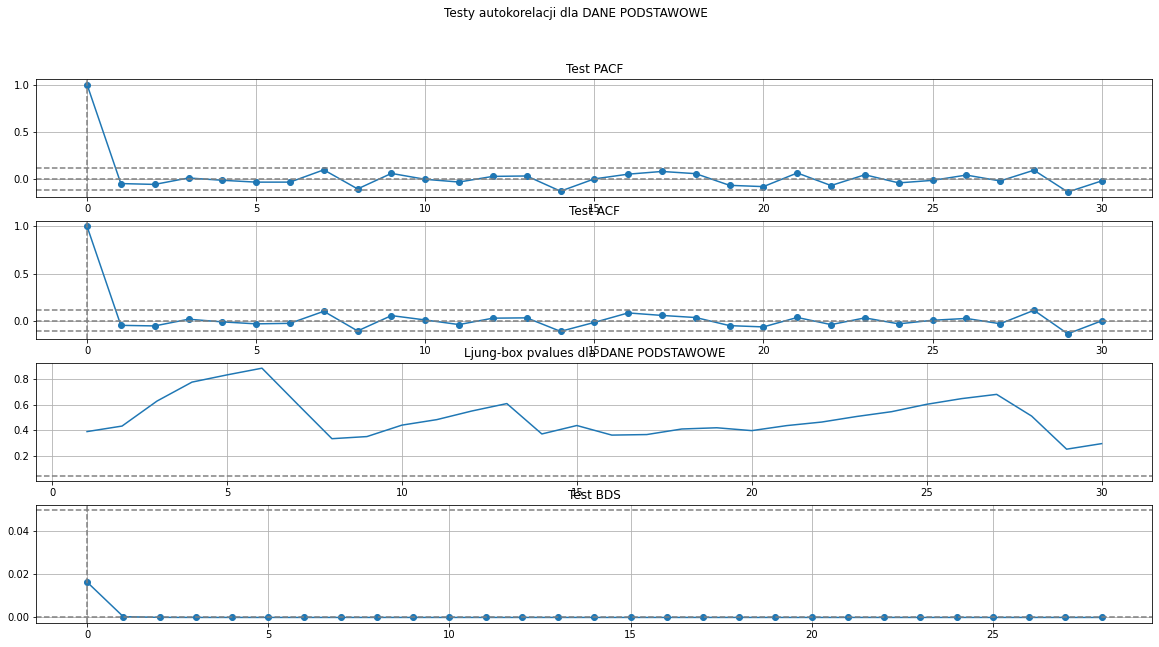

Pvalue testu Jarque-Bera:  2.435845969372963e-10
Statystyka testu Jarque-Bera:  44.27111376015418


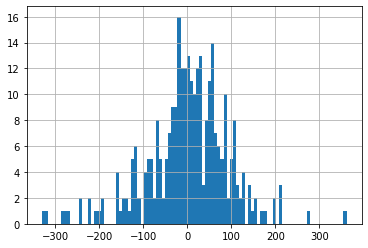

In [3]:
getter.analiza_statystyczna_szeregu(ixic_vec_norm)

In [4]:
cart_ar = CART_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt = cart_ar.cross_validation_rolling_window_julia(dlugosc_okna=1/3, params = {
    "max_depth": 10,
    "min_samples_split": 5,
    "min_samples_leaf": 5,
})
print(opt)
cart_ar.fit(opt)

Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1645]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz   43221531            0     22044765    590920343      5454640  ticks
       #2  4200 MHz   37412453            0      6895687    611878500       156468  ticks
       #3  4200 MHz   56235796            0     13394281    586556562       334546  ticks
       #4  4200 MHz   40104484            0      7427796    608654359       121875  ticks
       #5  4200 MHz   51199203            0     10905546    594081750       230609  ticks
       #6  4200 MHz   37110500            0      6573953    612502046       131656  ticks
       #7  4200 MHz   50932687            0      9678046    595575765       183312  ticks
       #8  4200 MHz   49149796            0      8730953    598305750     

[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll



2, 2, 3
2, 2, 4
2, 2, 5
2, 3, 2
2, 3, 3
2, 3, 4
2, 3, 5
2, 4, 2
2, 4, 3
2, 4, 4
2, 4, 5
2, 5, 2
2, 5, 3
2, 5, 4
2, 5, 5
3, 2, 2
3, 2, 3
3, 2, 4
3, 2, 5
3, 3, 2
3, 3, 3
3, 3, 4
3, 3, 5
3, 4, 2
3, 4, 3
3, 4, 4
3, 4, 5
3, 5, 2
3, 5, 3
3, 5, 4
3, 5, 5
4, 2, 2
4, 2, 3
4, 2, 4
4, 2, 5
4, 3, 2
4, 3, 3
4, 3, 4
4, 3, 5
4, 4, 2
4, 4, 3
4, 4, 4
4, 4, 5
4, 5, 2
4, 5, 3
4, 5, 4
4, 5, 5
5, 2, 2
5, 2, 3
5, 2, 4
5, 2, 5
5, 3, 2
5, 3, 3
5, 3, 4
5, 3, 5
5, 4, 2
5, 4, 3
5, 4, 4
5, 4, 5
5, 5, 2
5, 5, 3
5, 5, 4
5, 5, 5
6, 2, 2
6, 2, 3
6, 2, 4
6, 2, 5
6, 3, 2
6, 3, 3
6, 3, 4
6, 3, 5
6, 4, 2
6, 4, 3
6, 4, 4
6, 4, 5
6, 5, 2
6, 5, 3
6, 5, 4
6, 5, 5
7, 2, 2
7, 2, 3
7, 2, 4
7, 2, 5
7, 3, 2
7, 3, 3
7, 3, 4
7, 3, 5
7, 4, 2
7, 4, 3
7, 4, 4
7, 4, 5
7, 5, 2
7, 5, 3
7, 5, 4
7, 5, 5
8, 2, 2
8, 2, 3
8, 2, 4
8, 2, 5
8, 3, 2
8, 3, 3
8, 3, 4
8, 3, 5
8, 4, 2
8, 4, 3
8, 4, 4
8, 4, 5
8, 5, 2
8, 5, 3
8, 5, 4
8, 5, 5
9, 2, 2
9, 2, 3
9, 2, 4
9, 2, 5
9, 3, 2
9, 3, 3
9, 3, 4
9, 3, 5
9, 4, 2
9, 4, 3
9, 4, 4
9, 4, 5
9, 5, 2
9, 5, 3

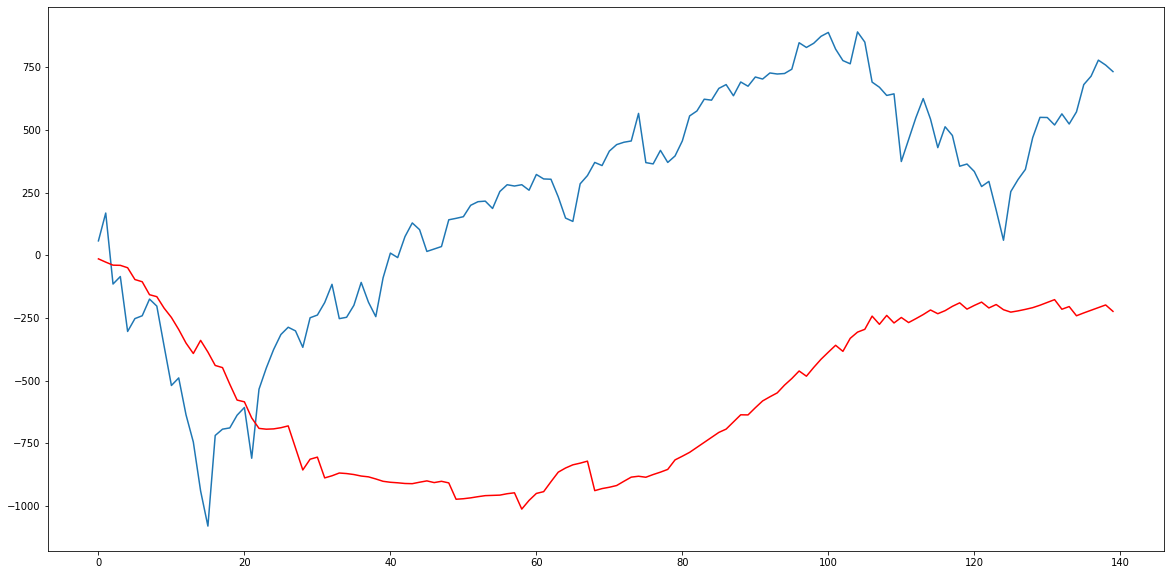

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(cart_ar.data[cart_ar.prog:].values))
plt.plot(np.cumsum(cart_ar.predictions), c='r')

forecast_raw


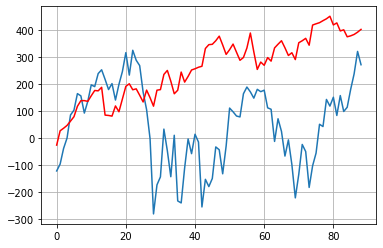

In [6]:
plt.plot(np.cumsum(cart_ar.data_test.values))
plt.plot(np.cumsum(cart_ar.forecast_raw()), c='r')
plt.grid()

In [7]:
rf_ar = RF_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt_rf = rf_ar.cross_validation_rolling_window_julia(dlugosc_okna=1/3, params = {
    "max_depth": 5,
    "n_estimators": 5,
    "min_samples_split": 5,
    "min_samples_leaf": 5
})

[ Info: Julia version info
[ Info: Julia executable: C:\Users\micuk\AppData\Local\Programs\Julia-1.7.2\bin\julia.exe
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: c:\users\micuk\pycharmprojects\vecm\scripts\python.exe
│     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll
│ Python:
│     python: c:\users\micuk\pycharmprojects\finalna_praca_licencjacka\scripts\python.exe
└     libpython: C:\Users\micuk\AppData\Local\Programs\Python\Python39\python39.dll


Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
      Microsoft Windows [Version 10.0.19044.1645]
  CPU: Intel(R) Core(TM) i7-7700K CPU @ 4.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  4200 MHz   43223546            0     22045031    590924875      5454671  ticks
       #2  4200 MHz   37413640            0      6895828    611883984       156468  ticks
       #3  4200 MHz   56238062            0     13394687    586560703       334546  ticks
       #4  4200 MHz   40106093            0      7427953    608659406       121875  ticks
       #5  4200 MHz   51200656            0     10905750    594086906       230609  ticks
       #6  4200 MHz   37111765            0      6574078    612507468       131656  ticks
       #7  4200 MHz   50934703            0      9678218    595580390       183312  ticks
       #8  4200 MHz   49151203            0      8731218    598310890     

{'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 2, 'min_samples_split': 2}
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 1) (69, 1)
(69, 

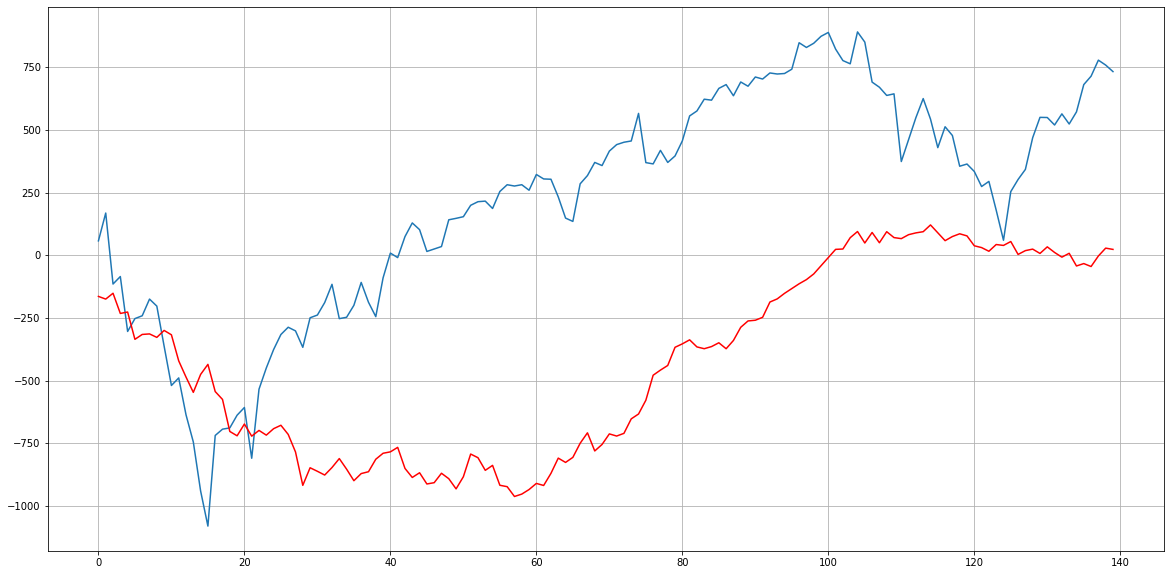

In [8]:
rf_ar.fit(opt_rf)

plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(rf_ar.data[rf_ar.prog:].values))
plt.plot(np.cumsum(rf_ar.predictions), c='r')
plt.grid()

forecast_raw
89 89
forecast_raw


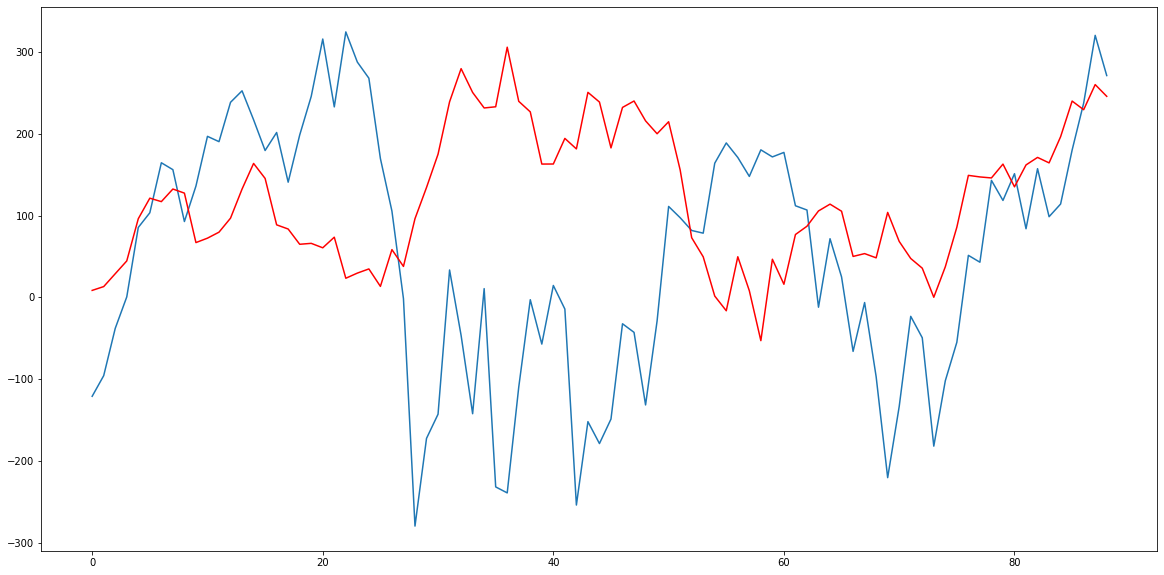

In [9]:
print(len(np.cumsum(rf_ar.data_test.values)), len(rf_ar.forecast_raw()))
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(rf_ar.data_test.values))
plt.plot(np.cumsum(rf_ar.forecast_raw()) , c='r')

In [10]:
knn_ar = KNN_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

opt_knn = knn_ar.cross_validation_rolling_window(dlugosc_okna=1/3, params={"k_neighbors":10,"weights":['uniform', 'distance'],"p":[1, 2]})

1
2
3
4
5
6
7
8
9
cross_validation_rolling_window


{'k_neighbors': 9, 'weights': 'uniform', 'p': 1}
fit


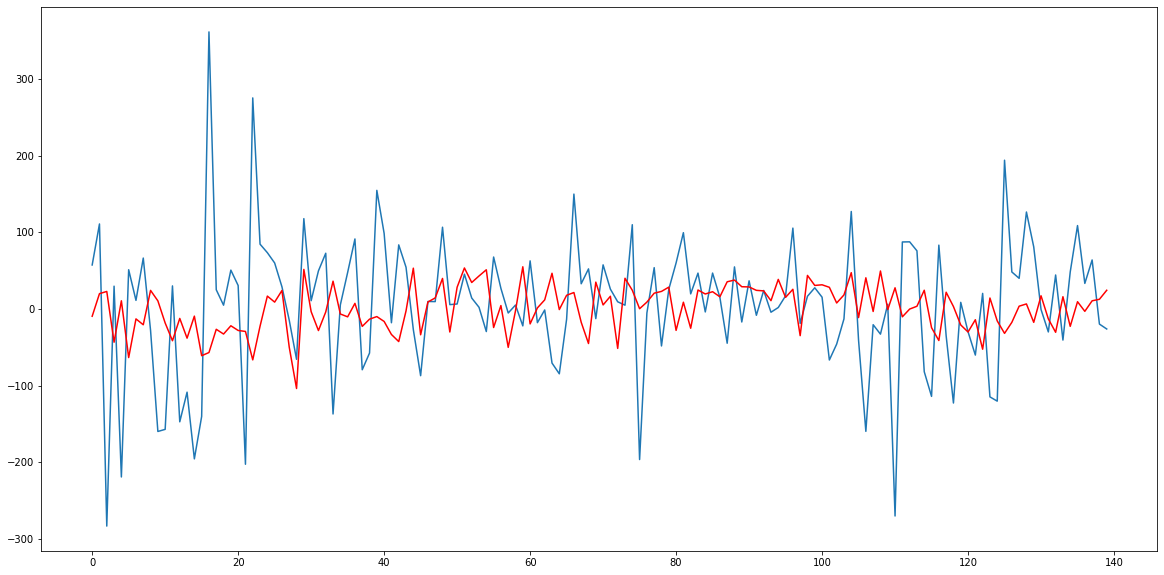

In [11]:
knn_ar.fit(opt_knn)

plt.figure(figsize=(20, 10))
plt.plot(knn_ar.data[knn_ar.prog:].values)
plt.plot(knn_ar.predictions, c='r')

forecast_raw


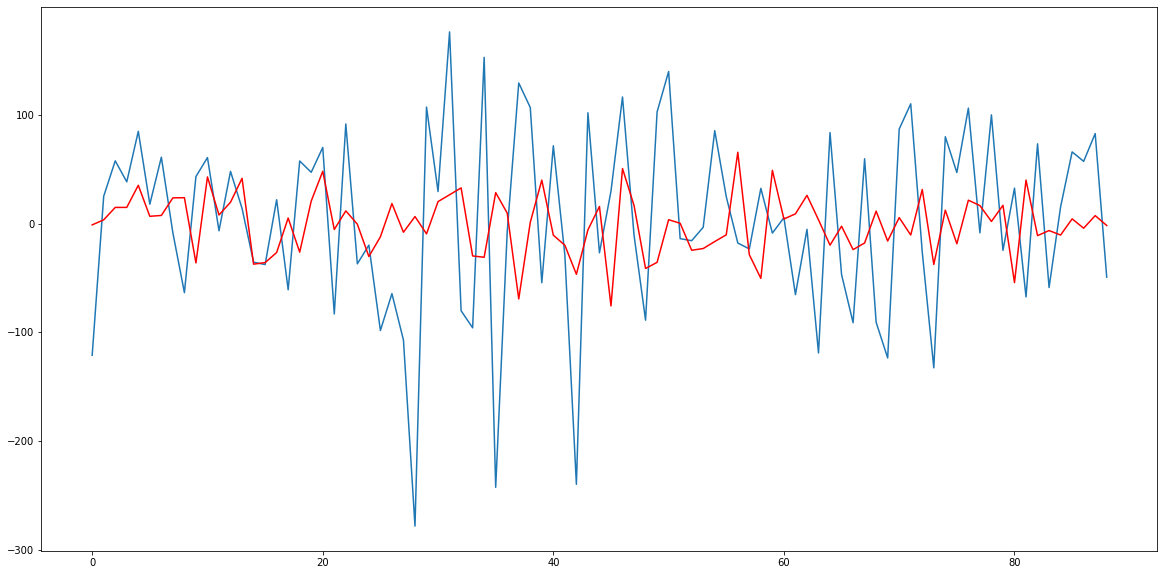

In [12]:
plt.figure(figsize=(20,10))
plt.plot(knn_ar.data_test.values)
plt.plot(knn_ar.forecast_raw(), c='r')

90
forecast_raw
90
forecast_raw


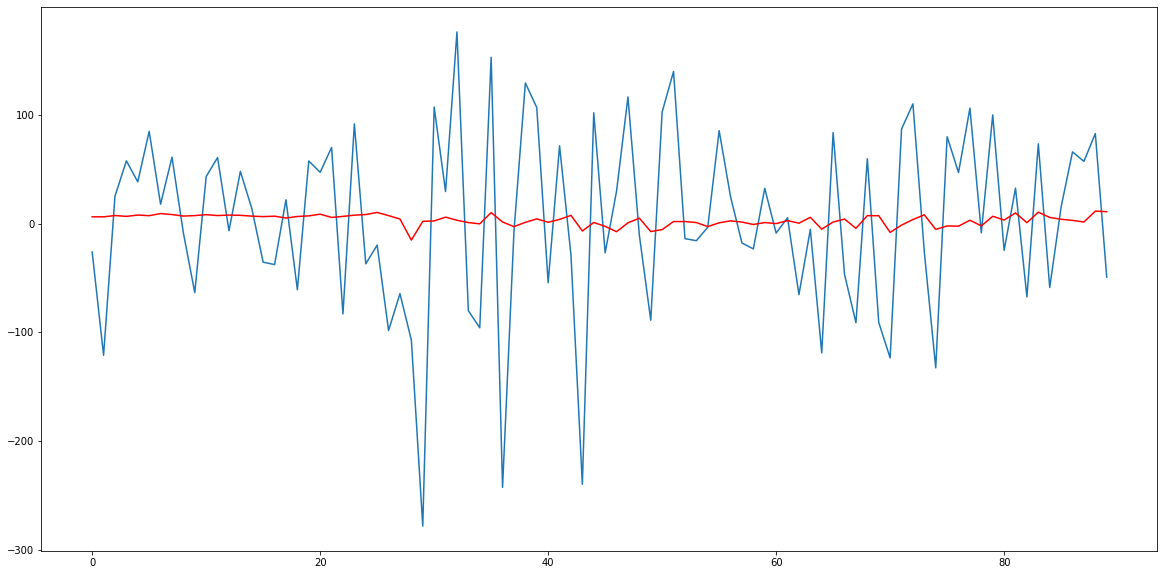

In [13]:
ar = AR_predict(data=ixic_vec_norm, p=1, test_ratio=.7, okno=1/3)
plt.figure(figsize=(20, 10))
print(len(ar.test.values))
print(len(ar.forecast_raw()))
plt.plot(ar.test.values)
plt.plot(ar.forecast_raw(), c='r')

In [14]:
def MSE(actual, preds):
    mse = (1 / len(preds)) * ((actual - preds) ** 2).sum()
    return mse
#print(len(cart_ar.data_test), len(cart_ar.forecast_raw()))
errors = pd.DataFrame(columns=["CART", "RF", "KNN", "AR"], index=["MSE"])
errors["CART"]["MSE"] = MSE(cart_ar.data_test.values, cart_ar.forecast_raw())
errors["RF"]["MSE"] = MSE(rf_ar.data_test.values, rf_ar.forecast_raw())
errors["KNN"]["MSE"] = MSE(knn_ar.data_test.values, knn_ar.forecast_raw())
errors["AR"]["MSE"] = MSE(ar.test.values, ar.forecast_raw())
errors

forecast_raw
forecast_raw
forecast_raw
forecast_raw


,CART,RF,KNN,AR
MSE,741206.901932,776128.605541,719314.555345,7047.788183


In [15]:
fitted_cart = cart_ar.predict()
fitted_rf = rf_ar.predict()
fitted_knn = knn_ar.predict()
cart_ar.data[cart_ar.prog:].values[:, 0]

array([  57.45996094,  110.96972656, -283.07958984,   29.82958984,
       -219.00976562,   51.27001953,   11.31005859,   66.47998047,
        -27.97998047, -159.66992188, -156.93017578,   30.18017578,
       -147.08007812, -108.41992188, -195.41992188, -140.0703125 ,
        361.43994141,   25.13037109,    5.02978516,   50.75976562,
         30.66015625, -202.43994141,  275.35986328,   84.61035156,
         73.52978516,   60.08007812,   28.98974609,  -14.58984375,
        -65.56005859,  117.91015625,   10.85986328,   49.77001953,
         72.77001953, -136.87011719,    5.41015625,   47.68994141,
         91.39990234,  -79.1796875 ,  -57.39013672,  154.79003906,
         98.66015625,  -17.87011719,   83.66992188,   54.54003906,
        -26.80029297,  -86.9296875 ,    9.85009766,    9.69970703,
        106.72021484,    5.75976562,    6.5703125 ,   45.45996094,
         14.35986328,    2.29980469,  -29.35986328,   67.83007812,
         26.91992188,   -5.16015625,    5.20996094,  -21.97998

In [16]:
predictions = pd.DataFrame({"CART": fitted_cart, "RF": fitted_rf, "KNN": fitted_knn, "ACTUAL": cart_ar.data[cart_ar.prog:].values[:, 0]})

forecasts = pd.DataFrame({"CART": cart_ar.forecast_raw(), "RF": rf_ar.forecast_raw(), "KNN": knn_ar.forecast_raw(), "ACTUAL": knn_ar.data_test.values[:, 0]})

optimum = pd.DataFrame({"CART": opt, "RF": opt_rf, "KNN": opt_knn})

forecast_raw
forecast_raw
forecast_raw


In [17]:
optimum.to_excel("OPTIMUM.xlsx")
predictions.to_excel("PREDICTIONS.xlsx")
forecasts.to_excel("FORECASTS.xlsx")
errors.to_excel("ERRORS.xlsx")

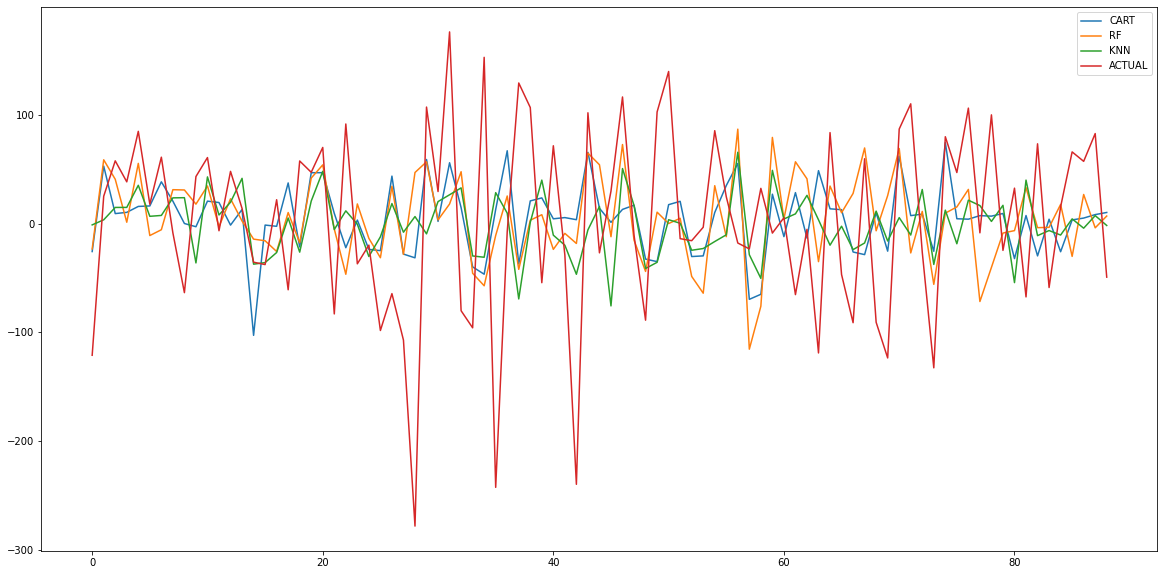

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(forecasts, label=forecasts.columns)
plt.legend()